 ### Fake News Detection using Machine Learning

In [1]:
# import the libraries
import pandas as pd # for data manipulation tasks
import numpy as np # numerical python, for doing mathematical operations
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
df = df.set_index('Unnamed: 0')

In [10]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
y = df.label

In [12]:
df = df.drop('label', axis = 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size = 0.33, random_state = 53)

In [19]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

print(count_train)
print(count_test)

  (1, 42470)	1
  (1, 12105)	1
  (1, 54177)	1
  (1, 50628)	1
  (1, 15924)	2
  (1, 44520)	2
  (1, 51896)	2
  (1, 35783)	4
  (1, 35256)	1
  (1, 21881)	1
  (1, 42534)	1
  (1, 8399)	1
  (1, 29531)	2
  (1, 15927)	2
  (1, 25686)	1
  (1, 49203)	2
  (1, 16814)	1
  (1, 36087)	1
  (1, 21568)	1
  (1, 25684)	1
  (1, 38823)	1
  (1, 47506)	1
  (1, 36831)	1
  (2, 16972)	1
  (2, 762)	1
  :	:
  (4243, 41435)	1
  (4243, 53607)	1
  (4243, 659)	1
  (4243, 38834)	1
  (4243, 19003)	1
  (4243, 11415)	1
  (4243, 7545)	1
  (4243, 22426)	1
  (4243, 54007)	1
  (4243, 7113)	1
  (4243, 4932)	1
  (4243, 39497)	1
  (4243, 50053)	1
  (4243, 38849)	1
  (4243, 20702)	1
  (4243, 42139)	1
  (4243, 17247)	1
  (4243, 50052)	1
  (4243, 55228)	1
  (4243, 29255)	1
  (4243, 49435)	1
  (4243, 11257)	1
  (4243, 52945)	1
  (4243, 20905)	1
  (4243, 7962)	1
  (0, 2385)	1
  (0, 3184)	1
  (0, 4067)	1
  (0, 4919)	1
  (0, 5460)	2
  (0, 7383)	1
  (0, 7422)	1
  (0, 7464)	1
  (0, 10525)	1
  (0, 10673)	2
  (0, 10984)	1
  (0, 10985)	2
  (0, 

In [20]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [26]:
tfidf_vectorizer.get_feature_names_out()[-10:]

array(['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى',
       'ยงade'], dtype=object)

In [24]:
count_vectorizer.get_feature_names_out()[:10]

array(['00', '000', '0000', '00000031', '000035', '00006', '0001',
       '0001pt', '000ft', '000km'], dtype=object)

In [27]:
count_df = pd.DataFrame(count_train.A, columns = count_vectorizer.get_feature_names_out())

In [28]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names_out())

In [29]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [30]:
print(count_df.equals(tfidf_df))

False


In [31]:
count_df.head(10)

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
def plot_confusion_matrix(cm, classes, normalize = False, 
                         title='Confusion matrix',
                         cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment = 'center',
                color = "white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [44]:
clf = MultinomialNB()

Accuracy: 0.857
Confusion matrix without normalization


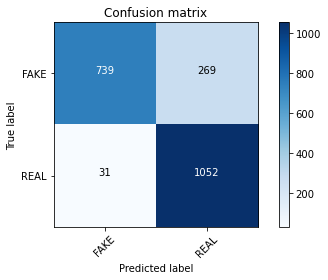

In [45]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [46]:
clf = MultinomialNB()

Accuracy: 0.893
Confusion matrix without normalization


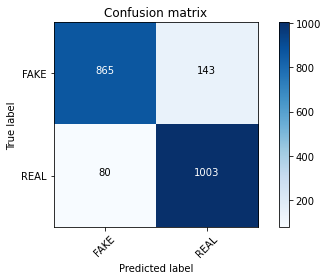

In [47]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [56]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

Accuracy: 0.935
Confusion matrix without normalization


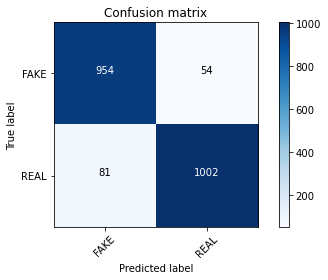

In [61]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels = ['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [62]:
clf = MultinomialNB(alpha = 0.1)

In [64]:
last_score = 0
for alpha in np.arange(0, 1, .1):
    nb_classifier = MultinomialNB(alpha = alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f}, Score: {:.5f}".format(alpha, score))

C:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.00, Score: 0.88140
Alpha: 0.10, Score: 0.89766
Alpha: 0.20, Score: 0.89383
Alpha: 0.30, Score: 0.89000
Alpha: 0.40, Score: 0.88570
Alpha: 0.50, Score: 0.88427
Alpha: 0.60, Score: 0.87470
Alpha: 0.70, Score: 0.87040
Alpha: 0.80, Score: 0.86609
Alpha: 0.90, Score: 0.85892
